In [ ]:
pip install osmnx

     |████████████████████████████████| 92kB 6.1MB/s 
     |████████████████████████████████| 11.5MB 21.9MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 1.0MB 33.1MB/s 
     |████████████████████████████████| 6.5MB 44.1MB/s 
     |████████████████████████████████| 972kB 34.6MB/s 
     |████████████████████████████████| 14.8MB 323kB/s 
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import osmnx as ox

In [ ]:
place= ["Berlin, Germany"]
place

['Berlin, Germany']

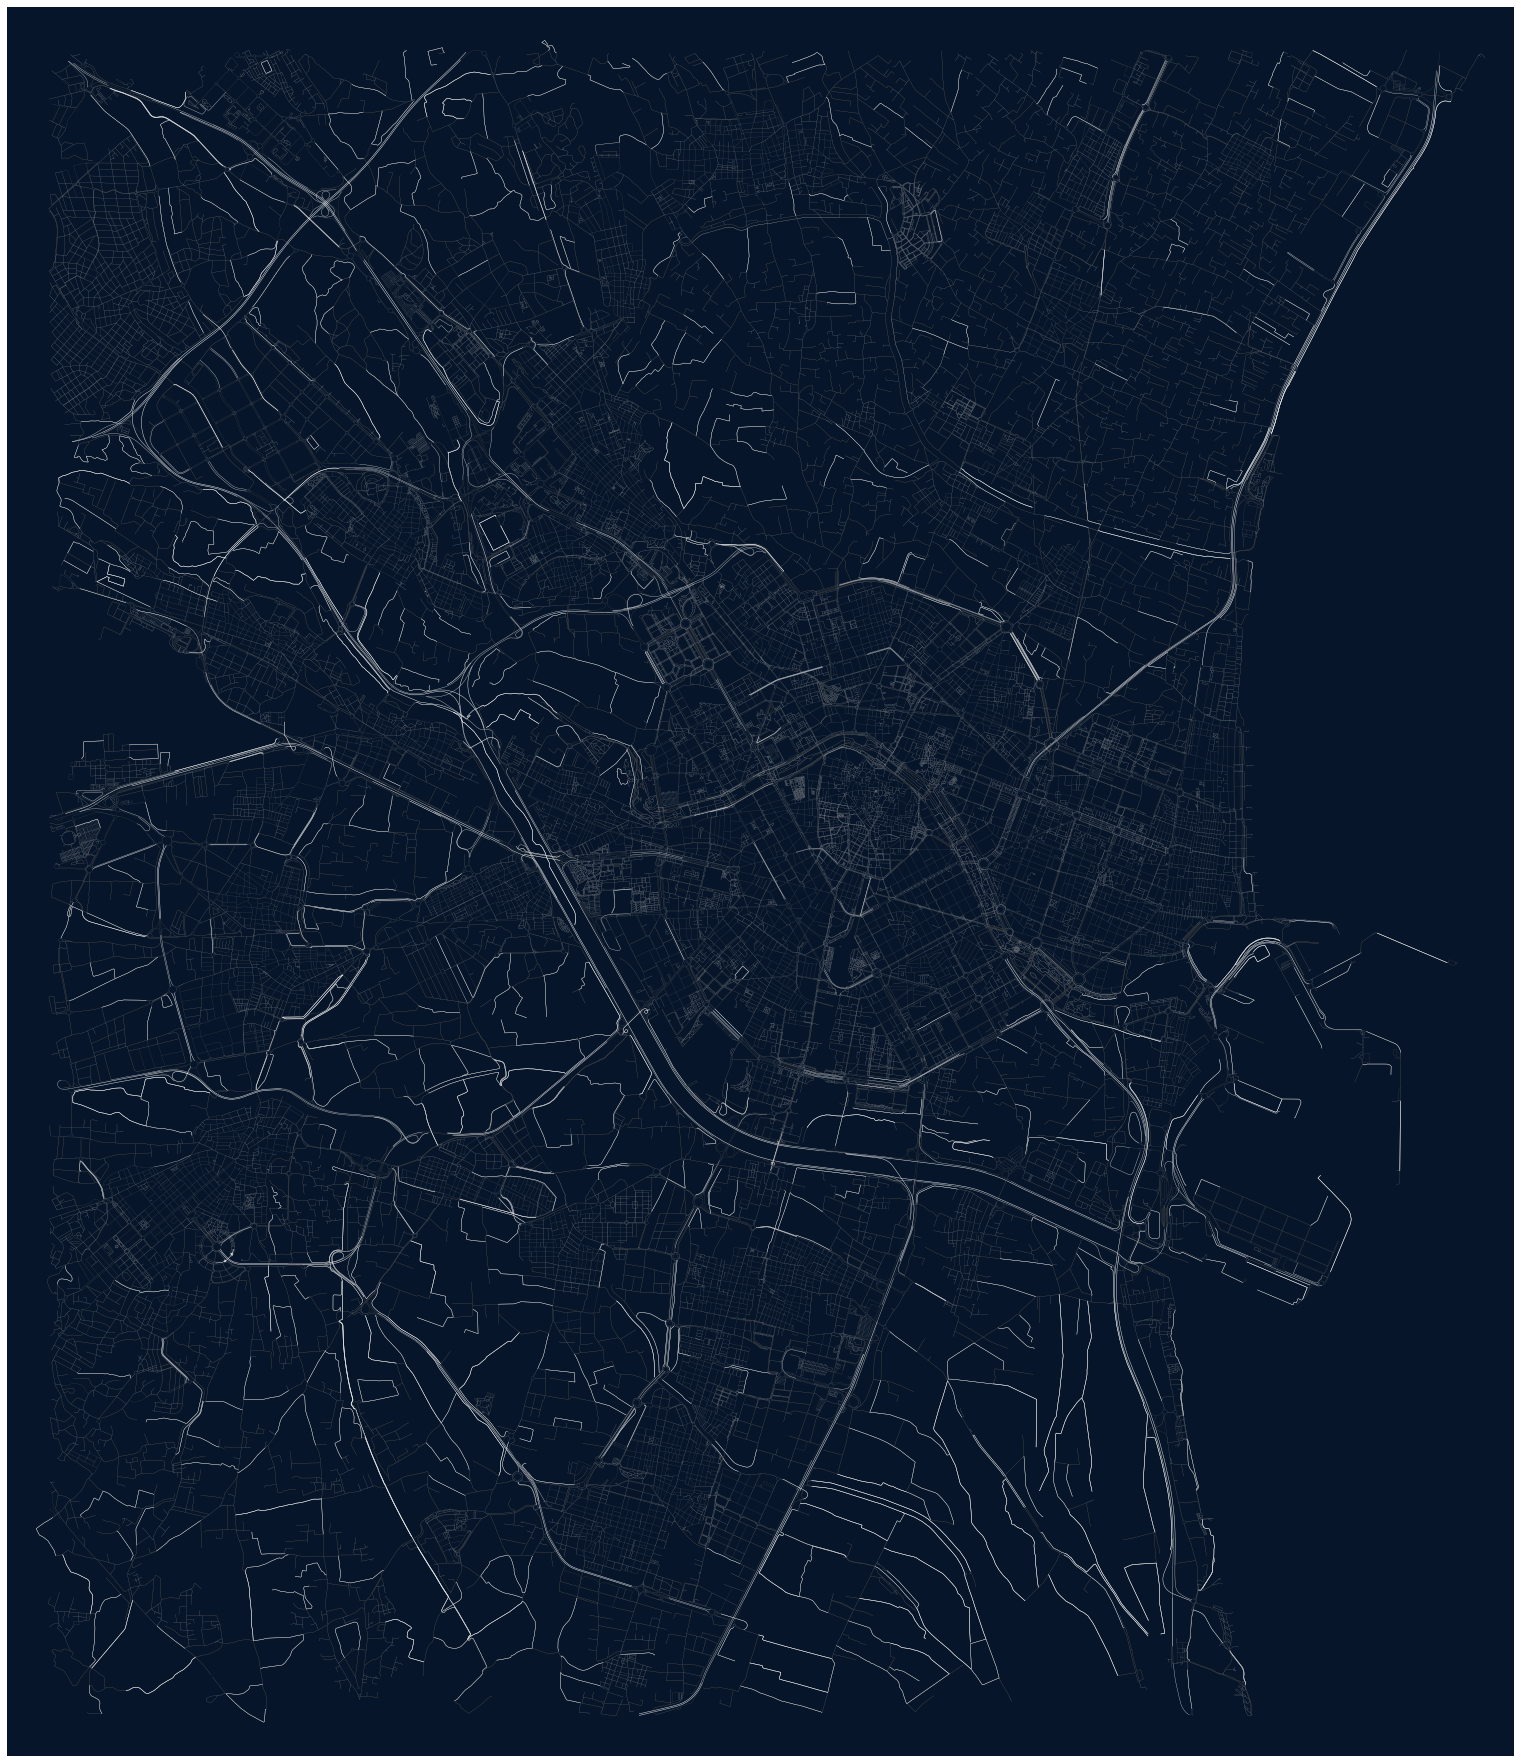

In [ ]:
center_point = (39.466667, -0.375000)
import networkx as nx
G1 = ox.graph_from_point(center_point, dist=15000, dist_type='bbox', network_type='all', 
                         simplify=True, retain_all=True, truncate_by_edge=False, 
                         clean_periphery=False, custom_filter='["natural"~"water"]')

G2 = ox.graph_from_point(center_point, dist=15000, dist_type='bbox', network_type='all', 
                         simplify=True, retain_all=True, truncate_by_edge=False, 
                         clean_periphery=False, custom_filter='["waterway"~"river"]')

Gwater = nx.compose(G1, G2)

In [ ]:
u = []
v = []
key = []
data = []
for uu, vv, kkey, ddata in Gwater.edges(keys=True, data=True):
    u.append(uu)
    v.append(vv)
    key.append(kkey)
    data.append(ddata)    


# List to store colors
roadColors = []
roadWidths = []

# #72b1b1
# #5dc1b9
for item in data:
    if "name" in item.keys():
        if item["length"] > 400: 
            color = "#72b1b1"
            linewidth = 2
        else:
            color = "#72b1b1"
            linewidth = 0.5
    else:
        color = "#72b1b1"
        linewidth = 0.5
        
    roadColors.append(color)    
    roadWidths.append(linewidth)

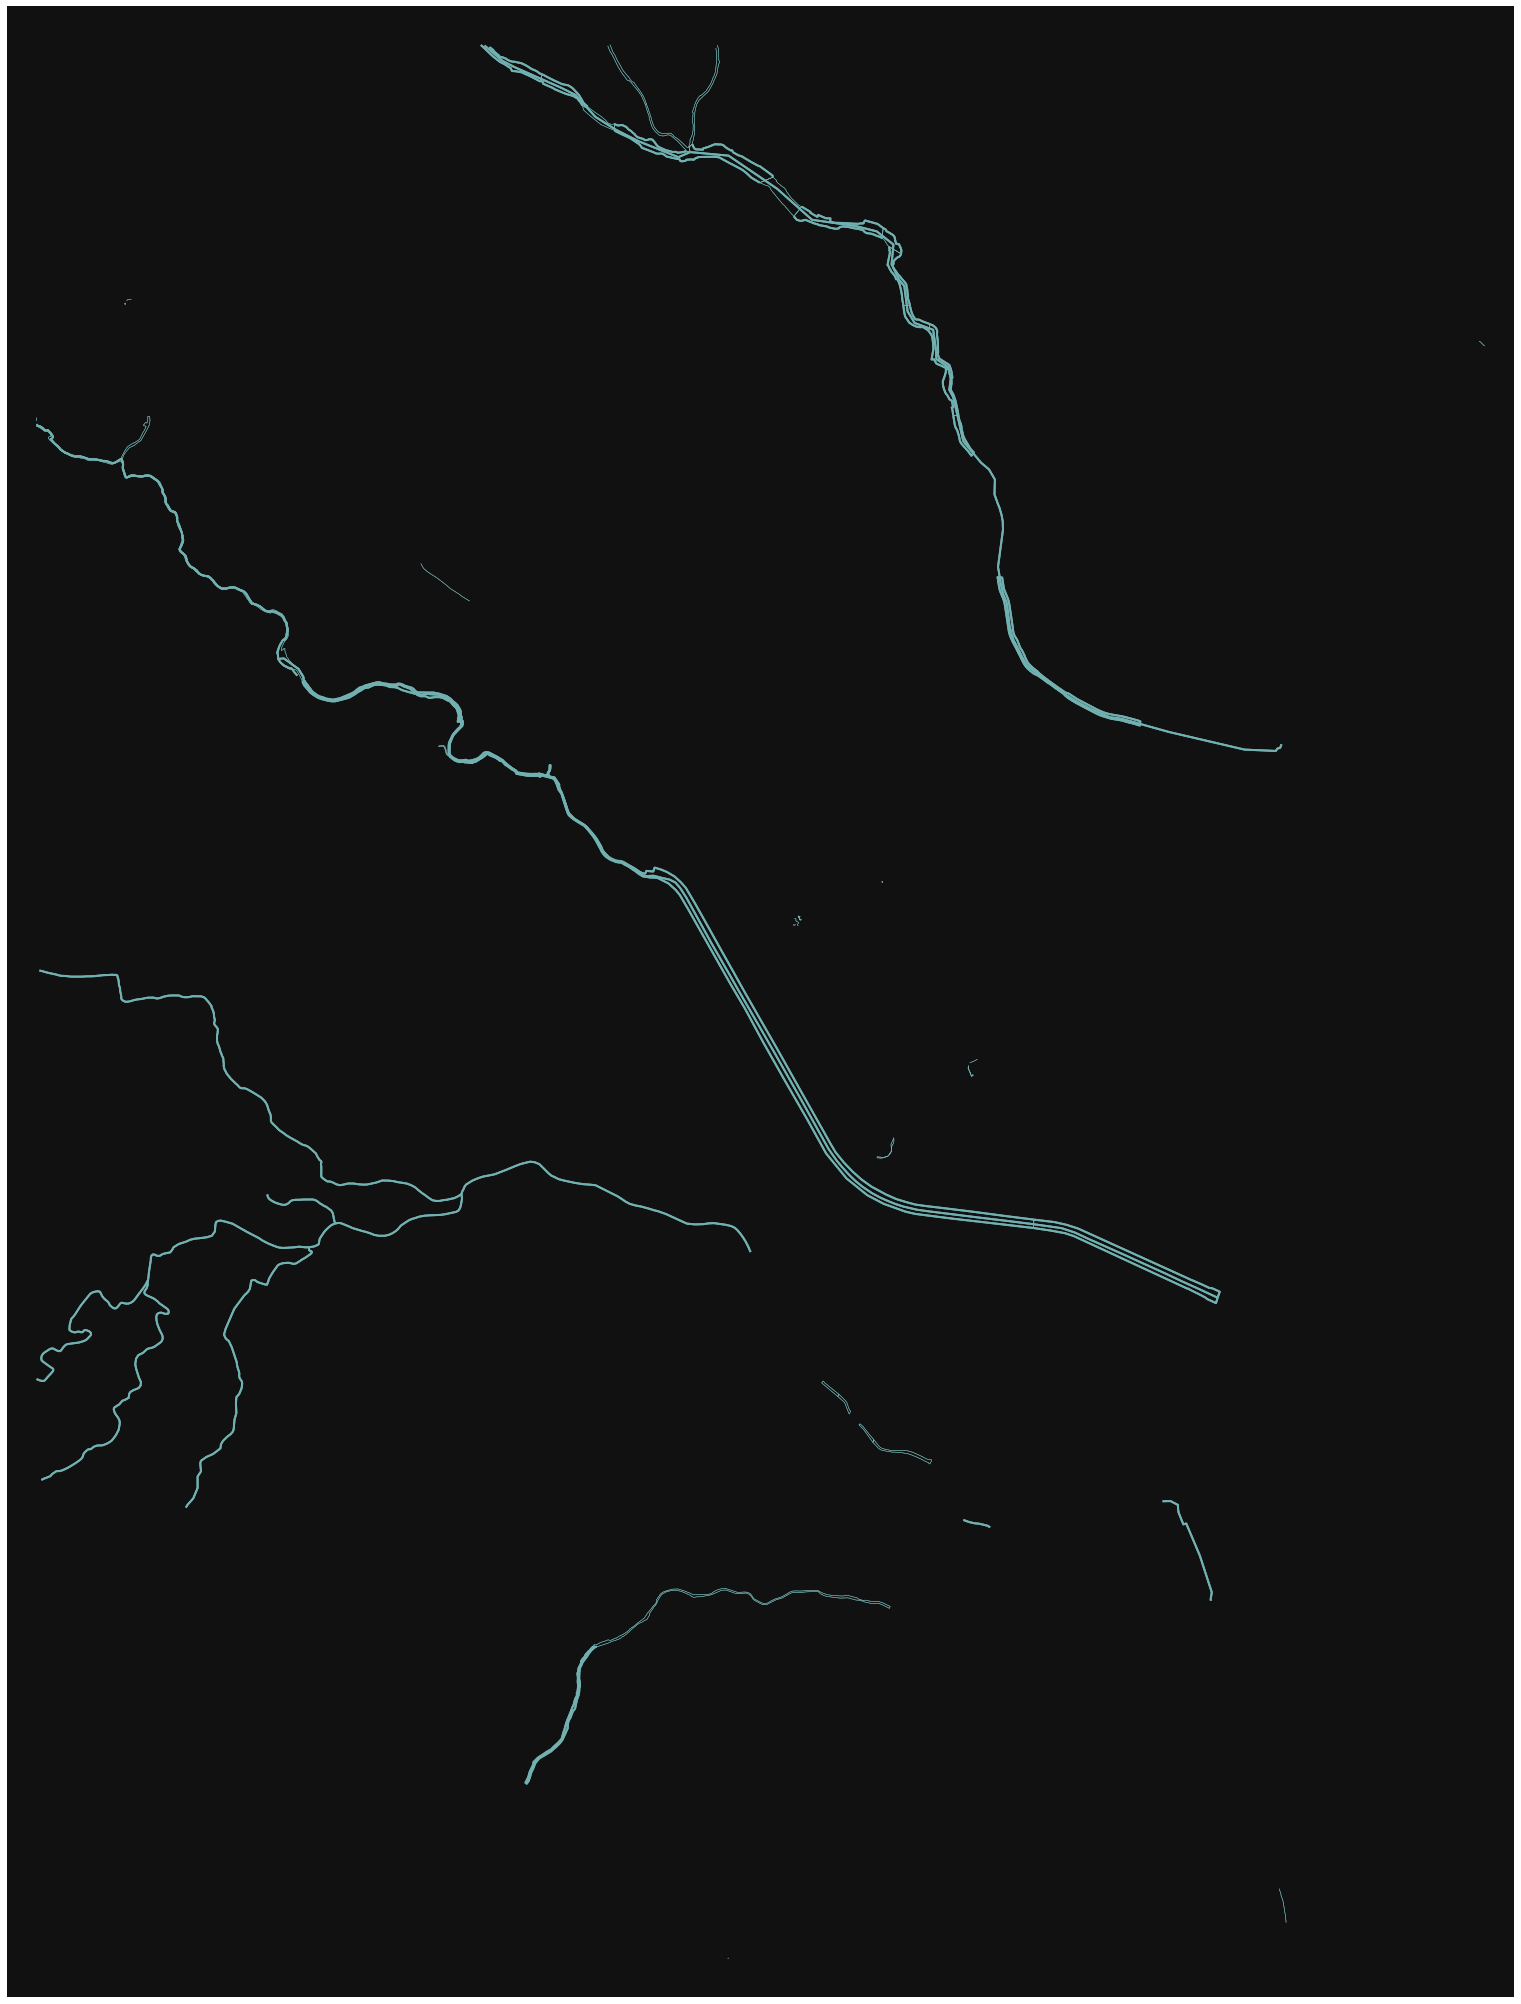

In [ ]:
fig, ax = ox.plot_graph(Gwater, node_size=0,figsize=(27, 40), 
                        dpi = 300, save = False, edge_color=roadColors,
                        edge_linewidth=roadWidths, edge_alpha=1)

fig.tight_layout(pad=0)
fig.savefig("water.png", dpi=300, format="png", bbox_inches='tight',
            facecolor=fig.get_facecolor(), transparent=True)